# Aim:  Develop a prediction model to understand how prices of cars vary with their specifications

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Import the data
cp = pd.read_csv("CarPrice_Assignment.csv")

# top 5 records of dataframe
cp.head()  

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
cp.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
# setting the 'car_ID' as index
cp.set_index('car_ID', inplace = True)

cp.head()

symboling                   CarName fueltype aspiration doornumber  \
car_ID                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   

            carbody drivewheel enginelocation  wheelbase  carlength  ...  \
car_ID                                                               ...   
1       convertible        rwd          front       88.6      168.8  ...   
2       convertible        rwd          front       88.6      168.8  ...   
3         hatchback        rwd          front       94.5      171.2  ...   
4             sedan        fwd          front       99.8      176.6  ...   
5             sedan        4wd          front       99.4      176.6  ...   

        enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
car_ID                                                                          
1              130        mpfi       3.47   2.68              9.0         111   
2              130        mpfi       3.47   2.68              9.0         111   
3              152        mpfi       2.68   3.47              9.0         154   
4              109        mpfi       3.19   3.40             10.0         102   
5              136        mpfi       3.19   3.40              8.0         115   

       peakrpm  citympg  highwaympg    price  
car_ID                                        
1         5000       21          27  13495.0  
2         5000       21          27  16500.0  
3         5000       19          26  16500.0  
4         5500       24          30  13950.0  
5         5500       18          22  17450.0  

[5 rows x 25 columns]

In [6]:
cp.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Number of instances in the target class
cp['price'].value_counts()

8916.5     2
16500.0    2
7609.0     2
7898.0     2
6692.0     2
          ..
9988.0     1
6189.0     1
16558.0    1
9233.0     1
8499.0     1
Name: price, Length: 189, dtype: int64

In [8]:
# check categories in CarName column
cp['CarName'].value_counts()

toyota corona      6
peugeot 504        6
toyota corolla     6
subaru dl          4
mazda 626          3
                  ..
bmw x1             1
vw dasher          1
audi 4000          1
nissan note        1
honda accord lx    1
Name: CarName, Length: 147, dtype: int64

# EDA

In [9]:
#display of CarName
cp['CarName']
#there are alot of values and most of them are misspelled.

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [10]:
# replace misspelled CarName
# for volkswagen
cp.loc[(cp.CarName=='vw'),'CarName']='volkswagen'
cp.loc[(cp.CarName=='vokswagen'),'CarName']='volkswagen'

# for porsche
cp.loc[(cp.CarName=='porcshce'),'CarName']='porsche'

#for toyota
cp.loc[(cp.CarName=='toyouta'),'CarName']='toyota'

#for nissan
cp.loc[(cp.CarName=='Nissan'),'CarName']='nissan'

#for mazda
cp.loc[(cp.CarName=='maxda'),'CarName']='mazda'

<AxesSubplot:>

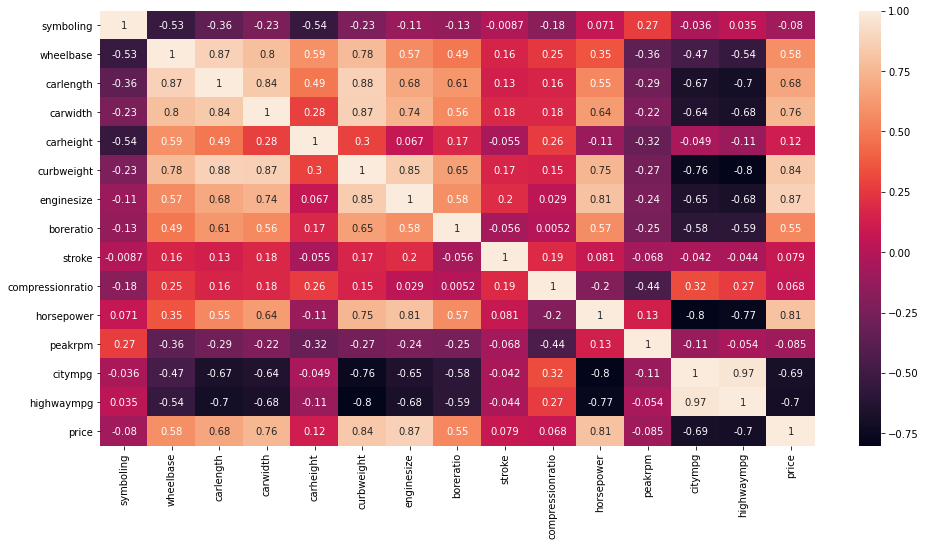

In [11]:
#Correlation between the features
plt.figure(figsize=(16,8))
sns.heatmap(cp.corr(),annot=True)

C:\Users\ruffi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

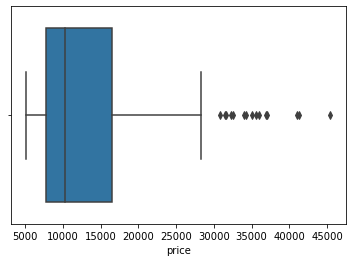

In [12]:
sns.boxplot(cp['price'])

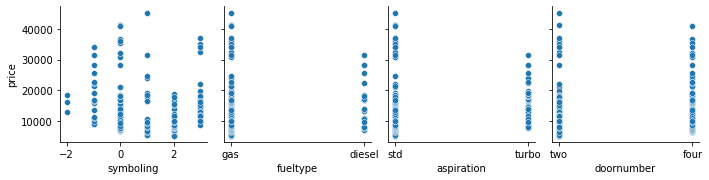

In [13]:
# Display how Price is related with other variables.
sns.pairplot(cp, x_vars=['symboling', 'fueltype', 'aspiration', 'doornumber'], y_vars='price', aspect=1, kind='scatter')
plt.show()

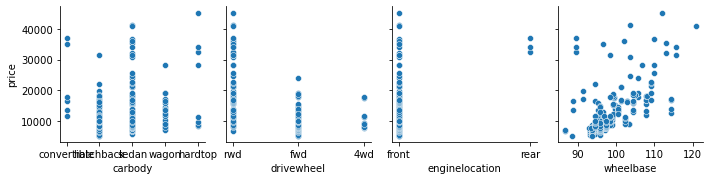

In [14]:
# Display how Price is related with other variables.
sns.pairplot(cp, x_vars=['carbody', 'drivewheel', 'enginelocation', 'wheelbase'], y_vars='price', aspect=1, kind='scatter')
plt.show()

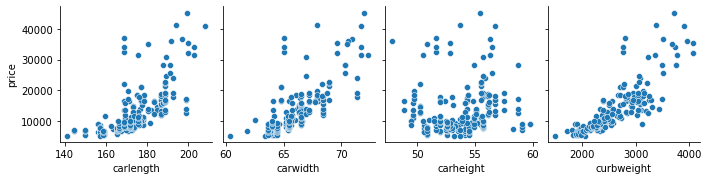

In [15]:
# Display how Price is related with other variables.
sns.pairplot(cp, x_vars=['carlength', 'carwidth', 'carheight', 'curbweight'], y_vars='price', aspect=1, kind='scatter')
plt.show()

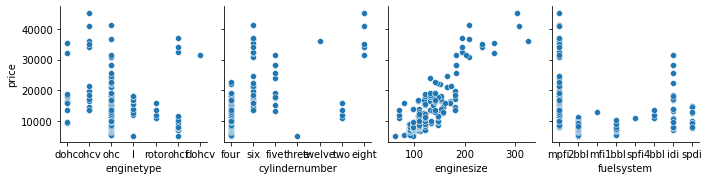

In [16]:
# Display how Price is related with other variables.
sns.pairplot(cp, x_vars=['enginetype', 'cylindernumber', 'enginesize', 'fuelsystem'], y_vars='price', aspect=1, kind='scatter')
plt.show()

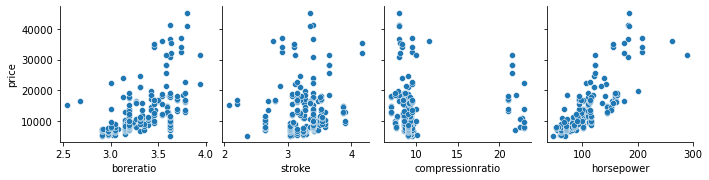

In [17]:
# Display how Price is related with other variables.
sns.pairplot(cp, x_vars=['boreratio', 'stroke', 'compressionratio', 'horsepower'], y_vars='price', aspect=1, kind='scatter')
plt.show()

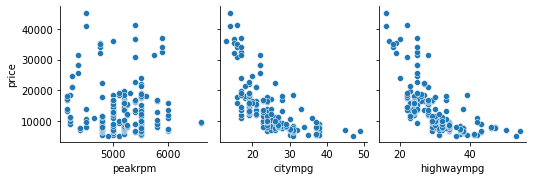

In [18]:
# Display how Price is related with other variables.
sns.pairplot(cp, x_vars=['peakrpm', 'citympg', 'highwaympg'], y_vars='price', aspect=1, kind='scatter')
plt.show()

**Data Preperation**


In [19]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cp['CarName'] = LE.fit_transform(cp['CarName'])
cp['fueltype'] = LE.fit_transform(cp['fueltype'])
cp['aspiration'] = LE.fit_transform(cp['aspiration'])
cp['doornumber'] = LE.fit_transform(cp['doornumber'])
cp['carbody'] = LE.fit_transform(cp['carbody'])
cp['drivewheel'] = LE.fit_transform(cp['drivewheel'])
cp['enginelocation'] = LE.fit_transform(cp['enginelocation'])
cp['enginetype'] = LE.fit_transform(cp['enginetype'])
cp['cylindernumber'] = LE.fit_transform(cp['cylindernumber'])
cp['fuelsystem'] = LE.fit_transform(cp['fuelsystem'])


In [20]:
cp.head()

symboling  CarName  fueltype  aspiration  doornumber  carbody  \
car_ID                                                                  
1               3        2         1           0           1        0   
2               3        3         1           0           1        0   
3               1        1         1           0           1        2   
4               2        4         1           0           0        3   
5               2        5         1           0           0        3   

        drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                    ...               
1                2               0       88.6      168.8  ...         130   
2                2               0       88.6      168.8  ...         130   
3                2               0       94.5      171.2  ...         152   
4                1               0       99.8      176.6  ...         109   
5                0               0       99.4      176.6  ...         136   

        fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
car_ID                                                                         
1                5       3.47    2.68               9.0         111     5000   
2                5       3.47    2.68               9.0         111     5000   
3                5       2.68    3.47               9.0         154     5000   
4                5       3.19    3.40              10.0         102     5500   
5                5       3.19    3.40               8.0         115     5500   

        citympg  highwaympg    price  
car_ID                                
1            21          27  13495.0  
2            21          27  16500.0  
3            19          26  16500.0  
4            24          30  13950.0  
5            18          22  17450.0  

[5 rows x 25 columns]

In [21]:
# predictor attribute  
X = cp.iloc[:,:-1].values     
# target attribute
y = cp.iloc[:,-1].values         

In [22]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

**Split the dataset for test and train**

In [23]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state=0)

**Building Linear Regression model**

In [24]:
# import the Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

**Initialize the Linear Regression model**

In [25]:
#initialize the linear regression model
regressor=LinearRegression()
regressor

LinearRegression()

**Fitting the Linear Regression Model**

In [26]:
#fit the Linear Regression Model
regressor.fit(X_train,y_train)

LinearRegression()

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [27]:
# Predicted the result
y_pred=regressor.predict(X_test)
y_pred

array([ 6066.21443403, 16991.49388357, 14099.07692262,  1690.73764977,
        9688.25642169, 12981.63154037,  7065.22981668,  4548.28228167,
       20223.97956341,  8034.31150557, 16142.23856107, 27043.69018579,
       10651.19042984, 13781.5371498 ,  7536.75201722, 11550.74769025,
        8736.05774456, 20333.0299429 ,  9670.9649313 ,  6753.12771659,
       10779.00407151, 20128.17687965,  8767.46523773, 12509.81016328,
       19289.91569502,  6903.27424612,  5847.64869806, 20603.64675442,
        7223.07702508,  6763.08755208,  6847.84045465,  9631.49613471,
       16743.77450664,  8764.98176772,  6481.63062022, 24265.35216806,
        9103.62472146, 14649.97142137,  7050.68735451, 36992.76025734,
        6056.24913533])

In [28]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)


-60983.64905137356
[ 2.82055665e+02 -2.79991435e+01  4.28206674e+03  1.07680239e+03
 -1.65075698e+03 -9.47611813e+02  1.20823269e+03  1.36912712e+04
  1.62921757e+02 -3.62401365e+01  6.41330367e+02  1.08151190e+02
  3.99430610e+00  1.45678927e+02  8.72419901e+01  7.02385648e+01
  4.75947039e+01 -2.01117537e+03 -2.85018993e+03  3.56525533e+02
  1.30591524e+01  1.26751143e+00  2.72767031e+01 -2.00807244e+01]


**Evaluation of Model**

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2530.407642946796
Mean Squared Error: 14606686.08022637
Root Mean Squared Error: 3821.869448349377


In [30]:
from sklearn.metrics import r2_score
print('R-squared:',r2_score(y_test, y_pred))

R-squared: 0.8113230018091993
